# 통합파일 분석 및 시각화

In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver
import requests
import re
import pandas as pd
import time
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
import OpenDartReader
import os
import seaborn as sns
import sys
import numpy as np

In [2]:
sys.maxsize
set_matplotlib_formats('retina')

plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus = False)

pd.options.display.float_format = '{:.2f}'.format
pd.options.display.max_columns = 200
pd.options.display.max_rows = 200

## 통합 파일 불러오기

In [3]:
search_df_nm = '반기보고서_선택기간'

data_list = os.listdir()

match_list = list()

for df_nm in data_list:
    if search_df_nm in df_nm:
        match_list.append(df_nm)
        
match_list      

['삼성생명_반기보고서_선택기간6_통합파일.csv', '한화생명_반기보고서_선택기간6_통합파일.csv']

In [4]:
df_list = list()

for i, file_nm in enumerate(match_list):
    df = pd.read_csv('./{}'.format(file_nm), encoding='utf-8-sig')
    df = df.drop(['Unnamed: 0', '보고기간'], axis = 1)
    df = df.rename(columns={'index':'보고기간'})
    df_list.append(df)

In [5]:
df_s = df_list[0]
df_h = df_list[1]

In [6]:
df_s.stack()
df_h.stack()

0  회사명                               한화생명
   보고기간                           2015.06
   <후속적으로 당기손익으로 재분류되지 않는 항목>           0
   <후속적으로 당기손익으로 재분류될 수 있는 항목>          0
   기타비용                            169545
                                   ...   
5  파생상품평가 및 거래손실                  1521660
   파생상품평가 및 거래이익                   296218
   해외사업장환산외환차이                          0
   현금흐름위험회피 파생상품평가손익                    0
   Unnamed: 49                          0
Length: 294, dtype: object

In [7]:
gs = df_s.groupby(['회사명','보고기간']).mean()

In [8]:
gh = df_h.groupby(['회사명','보고기간']).mean()

In [9]:
gs_t = gs.T
gh_t = gh.T

## join 으로 병합

In [10]:
df = gs_t.join(gh_t)

In [11]:
df = df.T.fillna(0)

In [12]:
df = df[df != 0]

In [13]:
df

관계기업의 기타포괄손익지분  기본주당이익     기타영업비용    기타영업수익  \
회사명  보고기간                                                   
삼성생명 2015.06         1559.00 2342.00   51589.00  54513.00   
     2016.06         9126.00 8690.00  855893.00  94245.00   
     2017.06         3168.00 5272.00 1448467.00 147687.00   
     2018.06         9170.00 8052.00 1622828.00 116167.00   
     2019.06         8988.00 4213.00 1323165.00 313344.00   
     2020.06         6588.00 3779.00 1276346.00 264171.00   
한화생명 2015.06             nan     nan        nan       nan   
     2016.06             nan     nan        nan       nan   
     2017.06             nan     nan        nan       nan   
     2018.06             nan     nan        nan       nan   
     2019.06             nan     nan        nan       nan   
     2020.06             nan     nan        nan       nan   

              당기손익으로 재분류되지 않는 포괄손익  당기손익인식금융자산관련손실  당기손익인식금융자산관련이익  당반기연결순이익  \
회사명  보고기간                                                                      
삼성생명 2015.06              -1146.00        60746.00        64269.00 442776.00   
     2016.06             -13802.00       179581.00       216731.00       nan   
     2017.06                213.00       179718.00       272991.00       nan   
     2018.06              -2397.00       240423.00       186422.00       nan   
     2019.06                   nan       302728.00       475889.00       nan   
     2020.06                   nan       723402.00      1062924.00 726419.00   
한화생명 2015.06                   nan             nan             nan       nan   
     2016.06                   nan             nan             nan       nan   
     2017.06                   nan             nan             nan       nan   
     2018.06                   nan             nan             nan       nan   
     2019.06                   nan             nan             nan       nan   
     2020.06                   nan             nan             nan       nan   

              대출채권및기타수취채권관련손실  대출채권및기타수취채권관련이익  만기보유금융자산평가손익  매도가능금융자산관련손실  \
회사명  보고기간                                                                    
삼성생명 2015.06          3211.00              nan        -92.00      21724.00   
     2016.06        149564.00              nan       -152.00      21039.00   
     2017.06        129889.00              nan        102.00       2055.00   
     2018.06        181988.00              nan        -16.00       5794.00   
     2019.06        214226.00              nan           nan      31459.00   
     2020.06        213223.00              nan           nan     139906.00   
한화생명 2015.06              nan              nan           nan           nan   
     2016.06              nan              nan           nan           nan   
     2017.06              nan              nan           nan           nan   
     2018.06              nan              nan           nan           nan   
     2019.06              nan              nan           nan           nan   
     2020.06              nan              nan           nan           nan   

              매도가능금융자산관련이익  매도가능금융자산평가손익  반기연결순이익의 귀속   반기연결총포괄이익     배당금수익  \
회사명  보고기간                                                                     
삼성생명 2015.06     116403.00   -2282645.00    442776.00 -1817311.00  31153.00   
     2016.06      57931.00    3229880.00          nan         nan 362919.00   
     2017.06      66642.00    2767311.00          nan         nan 539890.00   
     2018.06    1220216.00   -2416129.00          nan         nan 646013.00   
     2019.06     121911.00    4733241.00          nan  5670922.00 604232.00   
     2020.06     398839.00    -150419.00          nan   639257.00 544292.00   
한화생명 2015.06           nan     -45506.00          nan         nan       nan   
     2016.06           nan           nan          nan         nan       nan   
     2017.06           nan           nan          nan         nan       nan   
     2018.06           nan    -235807.00          nan         nan       nan 

In [14]:
df = df.reset_index()

In [15]:
df

,회사명,보고기간,관계기업의 기타포괄손익지분,기본주당이익,기타영업비용,기타영업수익,당기손익으로 재분류되지 않는 포괄손익,당기손익인식금융자산관련손실,당기손익인식금융자산관련이익,당반기연결순이익,대출채권및기타수취채권관련손실,대출채권및기타수취채권관련이익,만기보유금융자산평가손익,매도가능금융자산관련손실,매도가능금융자산관련이익,매도가능금융자산평가손익,반기연결순이익의 귀속,반기연결총포괄이익,배당금수익,법인세비용,법인세비용차감전연결순이익,법인세비용차감후기타포괄손익,보험계약부채전입액,보험료수익,비지배지분,사업비,수수료수익,순확정급여부채 재측정요소,신계약비상각비,영업비용,영업수익,영업외비용,영업외수익,영업이익,외환거래손실,외환거래이익,위험회피목적파생상품관련손실,위험회피목적파생상품관련이익,위험회피목적파생상품평가손익,이자비용,이자수익,임대료수익,재보험비용,재보험수익,재산관리비,지급보험금,지배기업의소유지분,지배기업주주지분에대한 주당이익,특별계정기타포괄손익,특별계정비용,특별계정수익,특별계정수입수수료,해외사업환산손익,후속적으로 당기손익으로 재분류될 수 있는 포괄손익,희석주당이익
0,삼성생명,2015.06,1559.00,2342.00,51589.00,54513.00,-1146.00,60746.00,64269.00,442776.00,3211.00,nan,-92.00,21724.00,116403.00,-2282645.00,442776.00,-1817311.00,31153.00,-35875.00,406901.00,-2260087.00,2436187.00,4376213.00,14.00,382475.00,348.00,-1146.00,514435.00,6507184.00,6890871.00,13962.00,37176.00,383687.00,22670.00,196391.00,175362.00,13691.00,8582.00,30415.00,1431669.00,106930.00,68008.00,57502.00,125751.00,2496969.00,442762.00,nan,-21129.00,117642.00,117642.00,324147.00,34784.00,-2258941.00,2342.00
1,삼성생명,2016.06,9126.00,8690.00,855893.00,94245.00,-13802.00,179581.00,216731.00,nan,149564.00,nan,-152.00,21039.00,57931.00,3229880.00,nan,nan,362919.00,337451.00,1958343.00,3173810.00,nan,8377590.00,51341.00,732578.00,1001789.00,-13802.00,1054421.00,14148406.00,15145310.00,942678.00,1904117.00,996904.00,193243.00,165434.00,119078.00,149615.00,-24662.00,176106.00,3315433.00,227742.00,150886.00,125460.00,657863.00,5262859.00,1569551.00,nan,16985.00,208951.00,208951.00,703989.00,-43565.00,3187612.00,8690.00
2,삼성생명,2017.06,3168.00,5272.00,1448467.00,147687.00,213.00,179718.00,272991.00,nan,129889.00,nan,102.00,2055.00,66642.00,2767311.00,nan,nan,539890.00,323192.00,1324037.00,2804258.00,4034125.00,8510477.00,54118.00,761215.00,1092732.00,213.00,1030751.00,14931385.00,16273490.00,98984.00,80916.00,1342105.00,632269.00,275762.00,237884.00,549897.00,8229.00,209902.00,3344053.00,207473.00,165789.00,135256.00,165181.00,5705602.00,946727.00,nan,1074.00,228538.00,228538.00,767358.00,41249.00,2804471.00,5272.00
3,삼성생명,2018.06,9170.00,8052.00,1622828.00,116167.00,-2397.00,240423.00,186422.00,nan,181988.00,nan,-16.00,5794.00,1220216.00,-2416129.00,nan,nan,646013.00,530678.00,2020422.00,-2245505.00,3211071.00,8050874.00,43805.00,1106063.00,1159502.00,-2397.00,775511.00,15249677.00,17242041.00,77543.00,105601.00,1992364.00,195415.00,630627.00,503985.00,158156.00,102555.00,227511.00,3470276.00,205924.00,186463.00,145802.00,161555.00,6572643.00,1445939.00,nan,10189.00,258427.00,258427.00,822137.00,51123.00,-2243108.00,8052.00
4,삼성생명,2019.06,8988.00,4213.00,1323165.00,313344.00,nan,302728.00,475889.00,nan,214226.00,nan,nan,31459.00,121911.00,4733241.00,nan,5670922.00,604232.00,258400.00,1052433.00,4876889.00,2835181.00,8057682.00,37427.00,1121236.00,852283.00,-863.00,735140.00,15517571.00,16487162.00,10449.00,93291.00,969591.00,123120.00,725992.00,567226.00,89590.00,-23181.00,354381.00,3574014.00,232088.00,215089.00,164906.00,150196.00,7272903.00,756606.00,nan,102136.00,271521.00,271521.00,824846.00,56568.00,nan,4213.00
5,삼성생명,2020.06,6588.00,3779.00,1276346.00,264171.00,nan,723402.00,1062924.00,726419.00,213223.00,nan,nan,139906.00,398839.00,-150419.00,nan,639257.00,544292.00,214231.00,940650.00,-87162.00,4033339.00,8555192.00,47892.00,1011685.00,830274.00,-1835.00,642157.00,17085437.00,18010079.00,39576.00,55584.00,924642.00,296144.00,878048.00,643646.00,197747.00,-50846.00,258323.00,3558984.00,190537.00,245650.00,180755.00,138020.00,7060382.00,678527.00,nan,58803.00,403214.00,403214.00,797639.00,50547.00,nan,3779.00
6,한화생명,2015.06,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-45506.00,nan,nan,nan,123247.00,nan,nan,2521364.00,4780235.00,-52.00,421277.00,nan,nan,604445.00,7490439.00,8013635.00,23913.00,45186.00,523195.00,nan,nan,nan,nan,nan,nan,1355906.00,nan,80150.00,69414.00,46064.00,2857427.00,nan,nan,6521.00,59914.00,59914.00,448465.00,nan,nan,nan
7,한화생명,2016.06,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,n

In [16]:
p = df.pivot_table(index = '보고기간', columns = '회사명', values = ['영업이익','보험료수익','법인세비용','지급보험금'])

## 시각화

### seaborn 이용

Text(0.5, 1.0, '회사별 영업이익 비교')

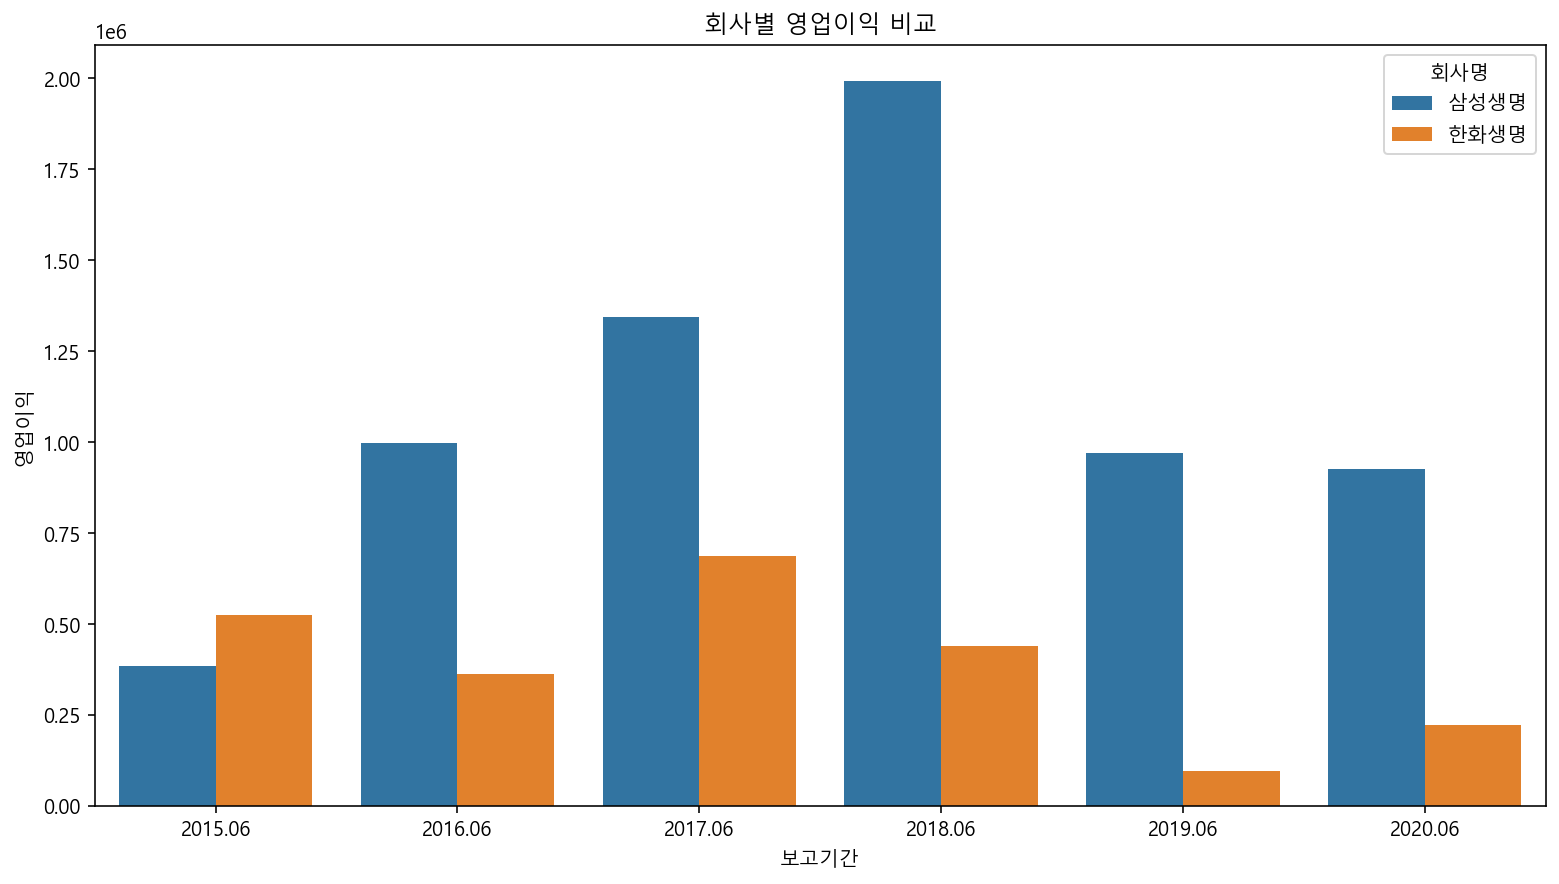

In [17]:
plt.figure(figsize=(13, 7))
sns.barplot(data=df, x="보고기간", y="영업이익", hue="회사명").set_title('회사별 영업이익 비교')

Text(0.5, 1.0, '회사별 지급보험금 비교')

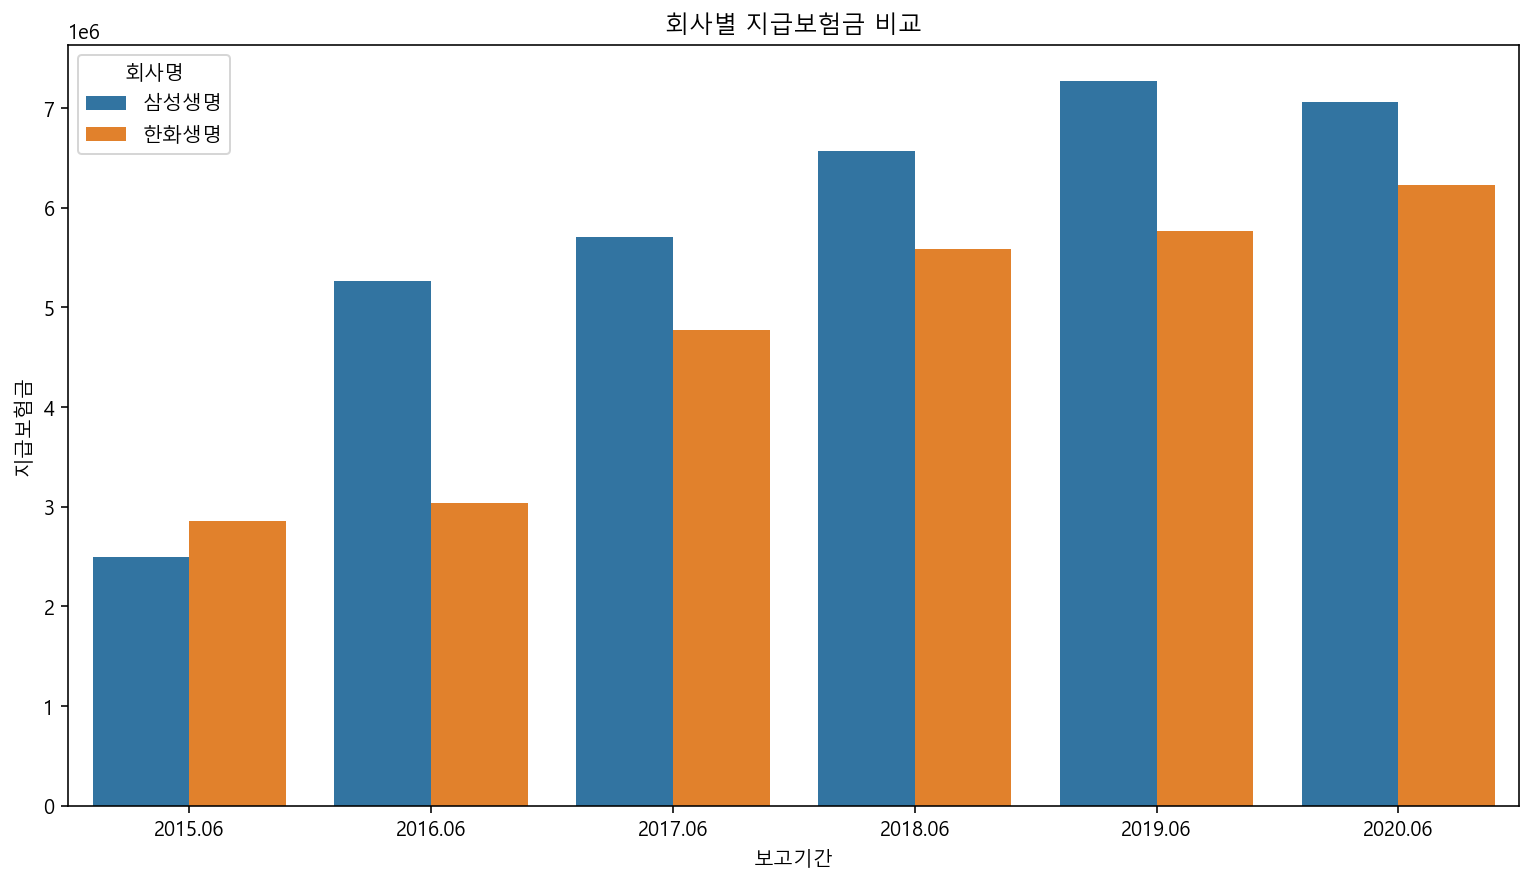

In [18]:
plt.figure(figsize=(13, 7))
sns.barplot(data=df, x="보고기간", y="지급보험금", hue="회사명").set_title('회사별 지급보험금 비교')

<Figure size 936x720 with 0 Axes>

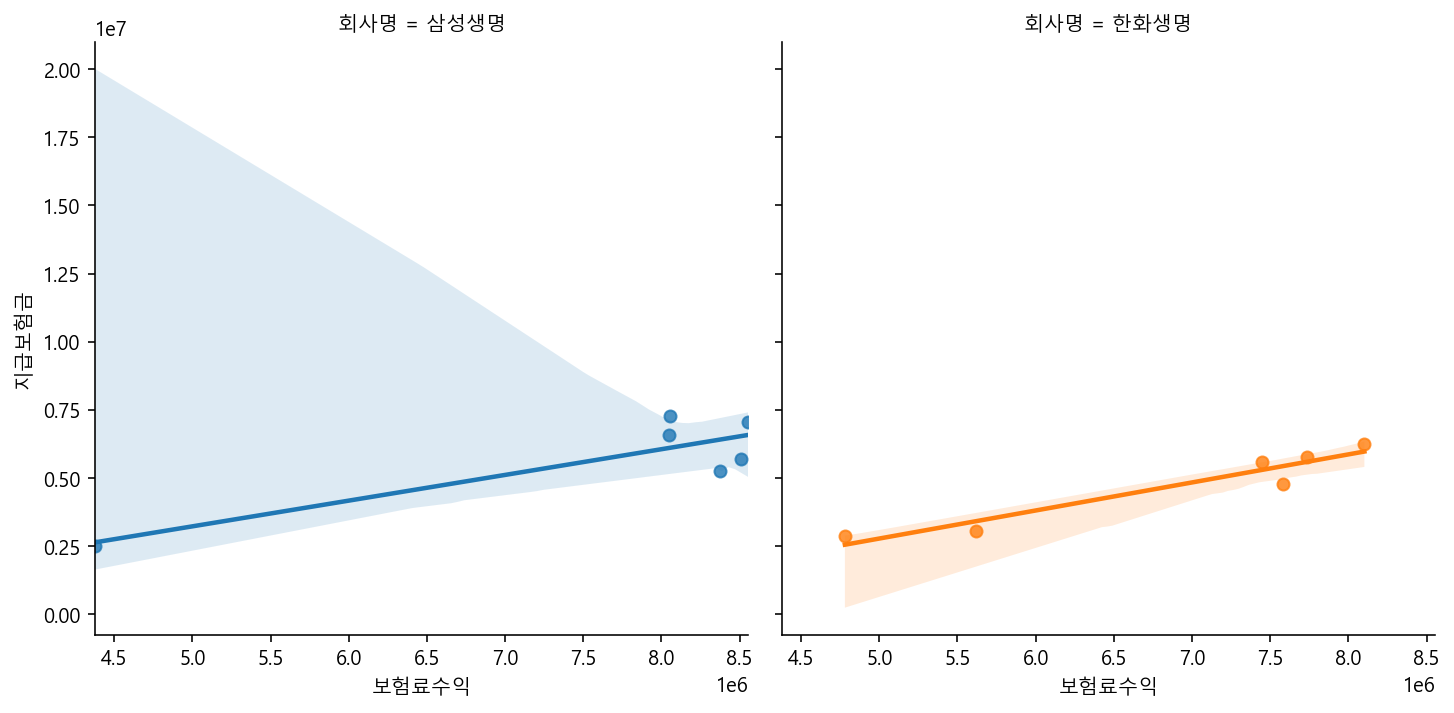

In [28]:
plt.figure(figsize=(13, 10))
sns.lmplot(data=df, x="보험료수익", y="지급보험금", hue="회사명", col="회사명", col_wrap=2,  x_jitter=.1)

Text(0.5, 1.0, '영업이익과 지급보험금 회귀분석')

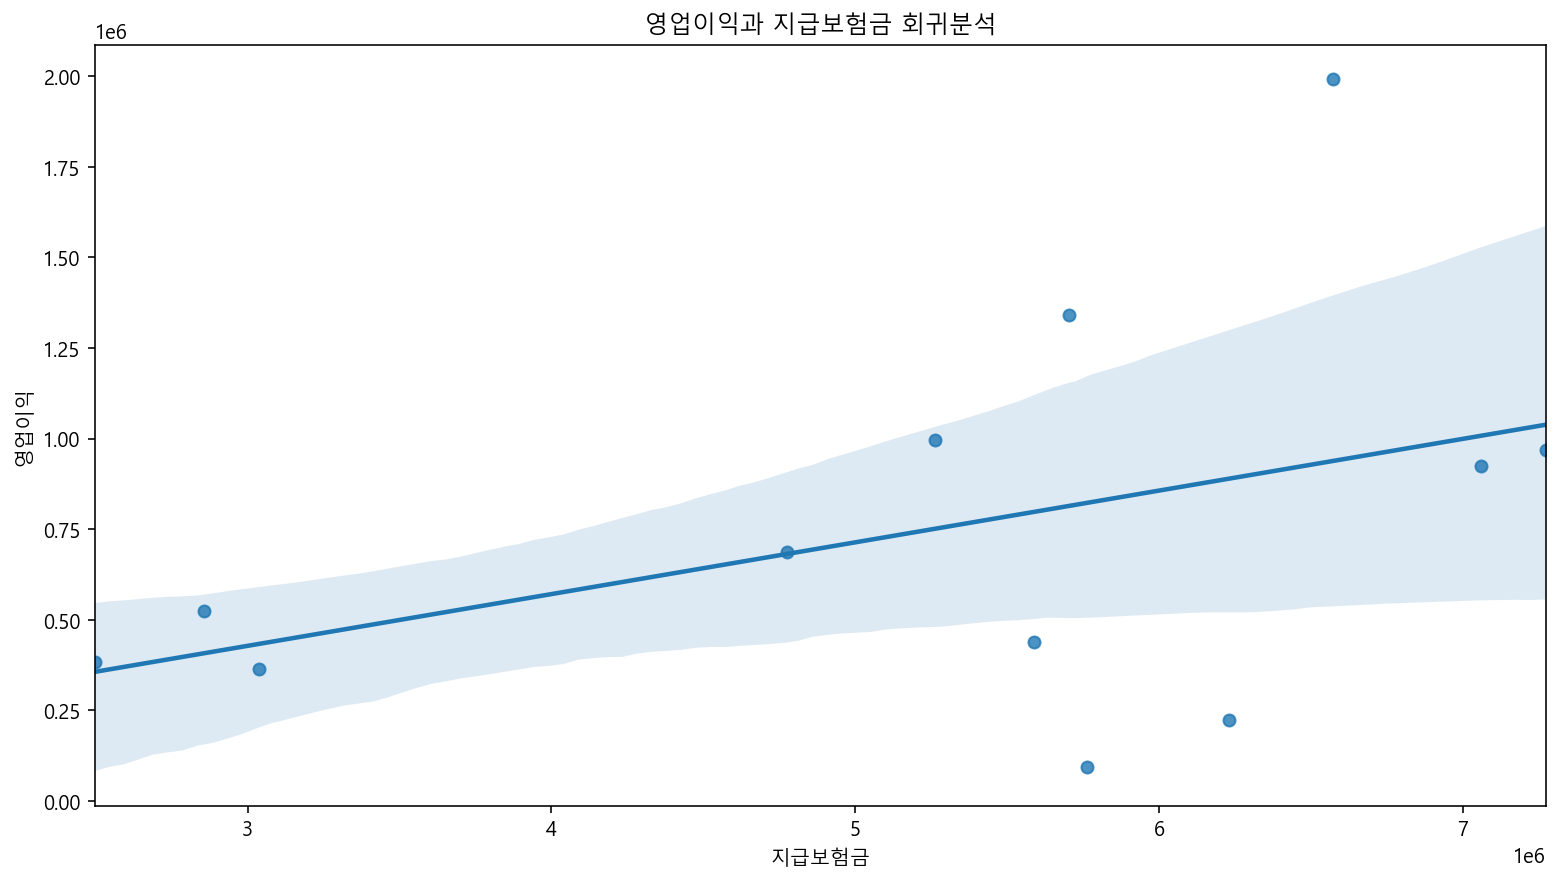

In [29]:
plt.figure(figsize=(13, 7))
sns.regplot(data=df, x="지급보험금", y="영업이익", x_jitter=.1).set_title('영업이익과 지급보험금 회귀분석')

In [21]:
p = p.stack()

In [22]:
p = p.reset_index()

In [23]:
ps = p[p['회사명'] == '삼성생명']
ph = p[p['회사명'] == '한화생명']

In [24]:
ps['보고기간'] = ps['보고기간'].astype(str)
ph['보고기간'] = ph['보고기간'].astype(str)

<ipython-input-24-ee0a0f05508a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ps['보고기간'] = ps['보고기간'].astype(str)
<ipython-input-24-ee0a0f05508a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ph['보고기간'] = ph['보고기간'].astype(str)


In [25]:
ph.dtypes

보고기간      object
회사명       object
법인세비용    float64
보험료수익    float64
영업이익     float64
지급보험금    float64
dtype: object

Text(0.5, 1.0, '한화생명 포괄손익계산서 상관관계 분석')

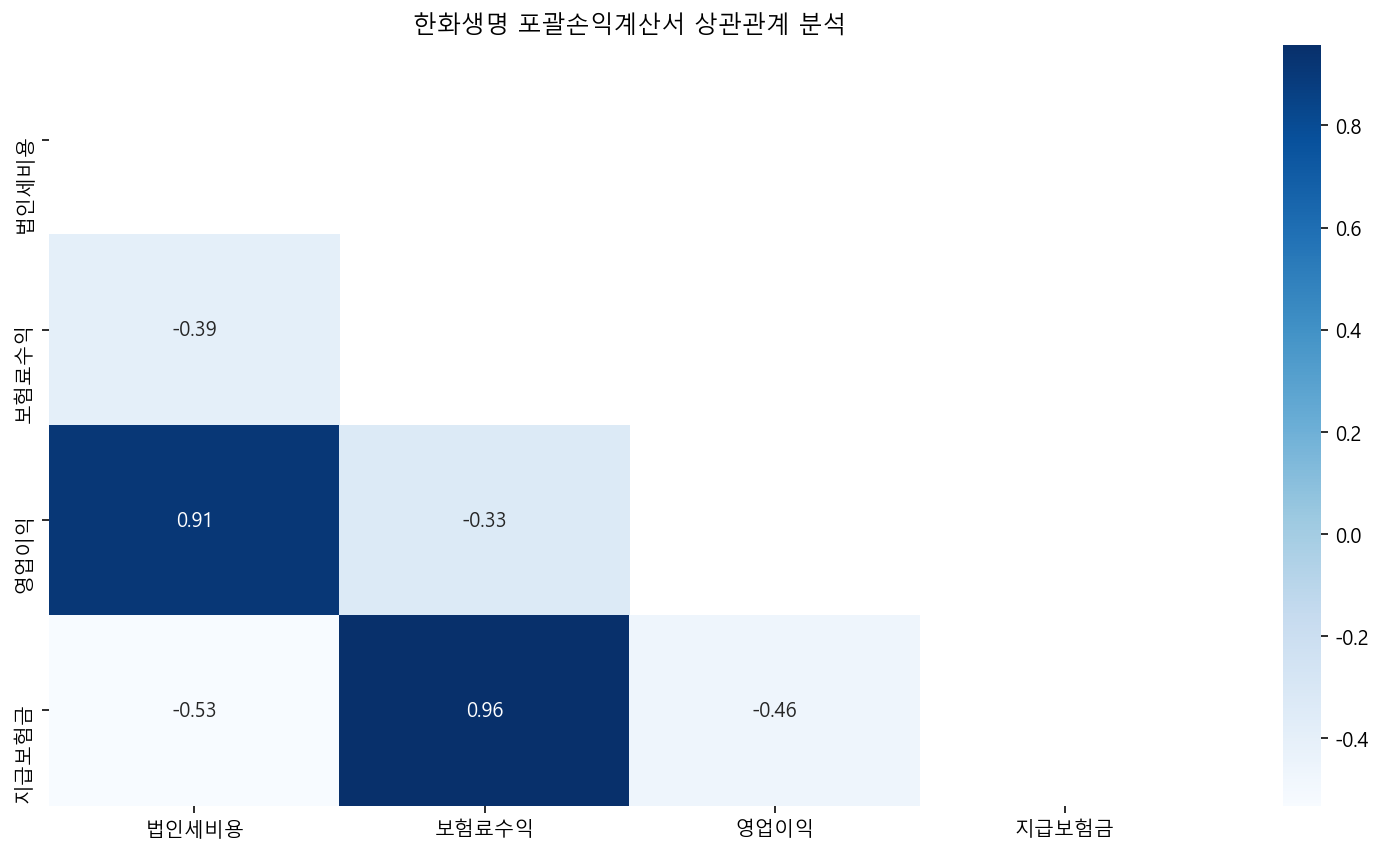

In [26]:
plt.figure(figsize=(13, 7))
corr = ph.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, annot=True, cmap="Blues", mask=mask).set_title('한화생명 포괄손익계산서 상관관계 분석')

Text(0.5, 1.0, '삼성생명 포괄손익계산서 상관관계 분석')

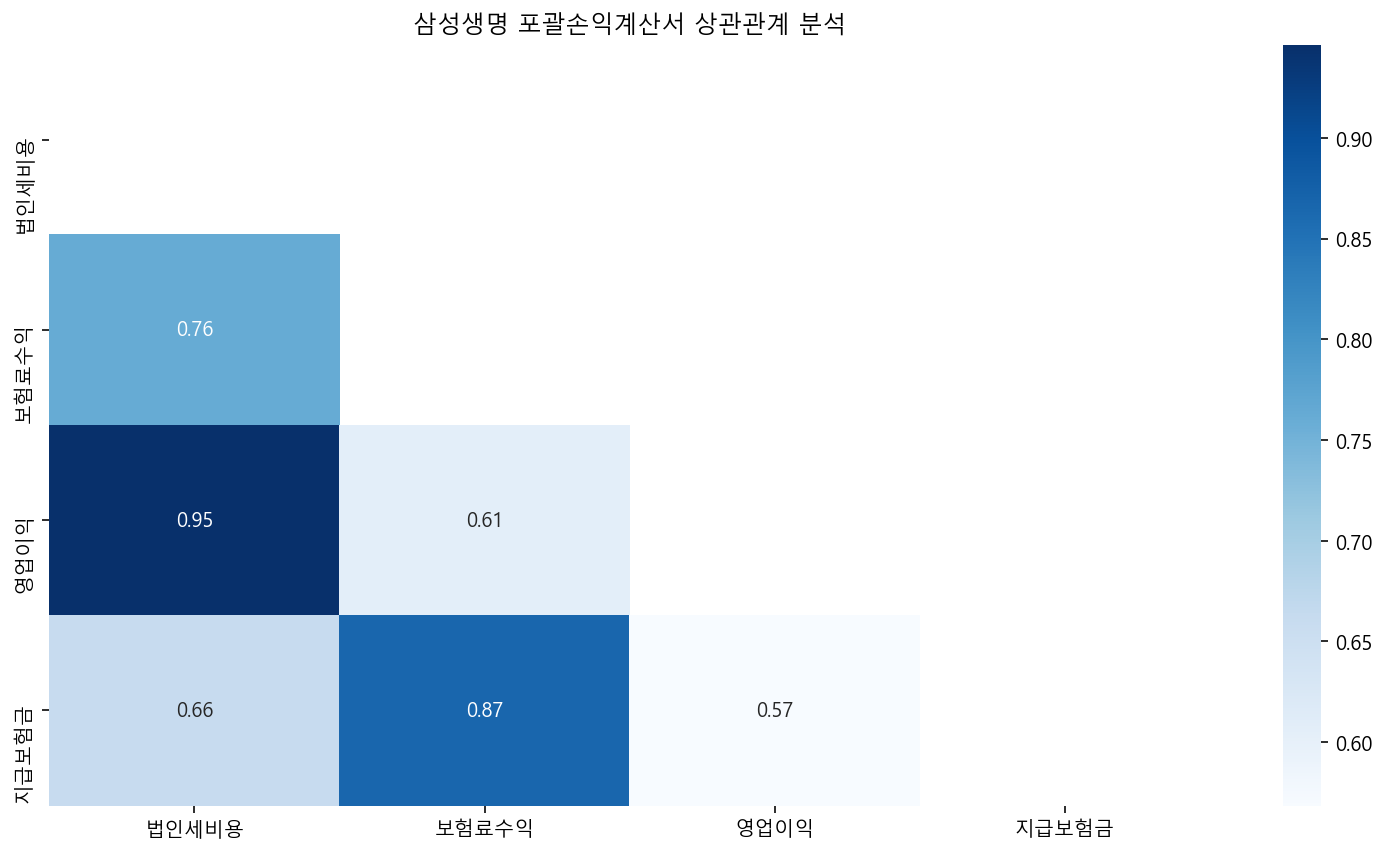

In [27]:
plt.figure(figsize=(13, 7))
corr = ps.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, annot=True, cmap="Blues", mask=mask).set_title('삼성생명 포괄손익계산서 상관관계 분석')

###  matplotlib 이용

In [36]:
p_s = p[p['회사명']=='삼성생명']

In [114]:
p_h = p[p['회사명']=='한화생명']

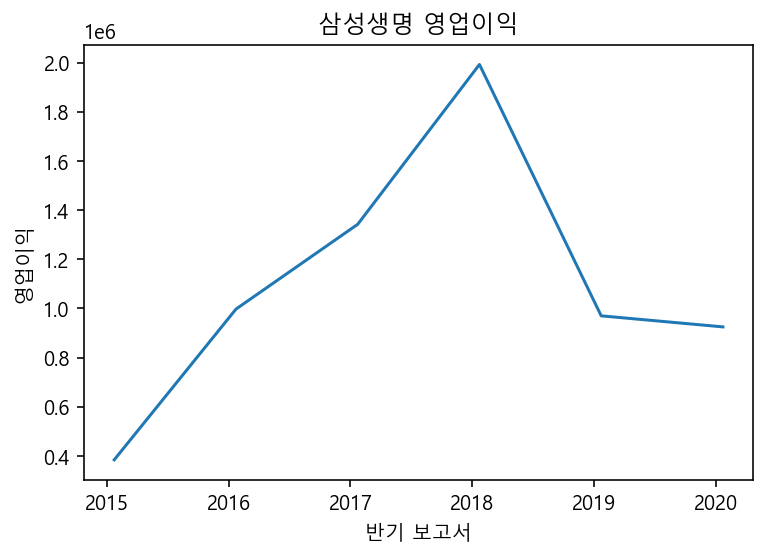

In [115]:
x = p_s.보고기간
y = p_s.영업이익
plt.plot(x, y)
plt.title("삼성생명 영업이익")
plt.xlabel("반기 보고서")
plt.ylabel("영업이익")
plt.savefig('삼성생명 영업이익.png')

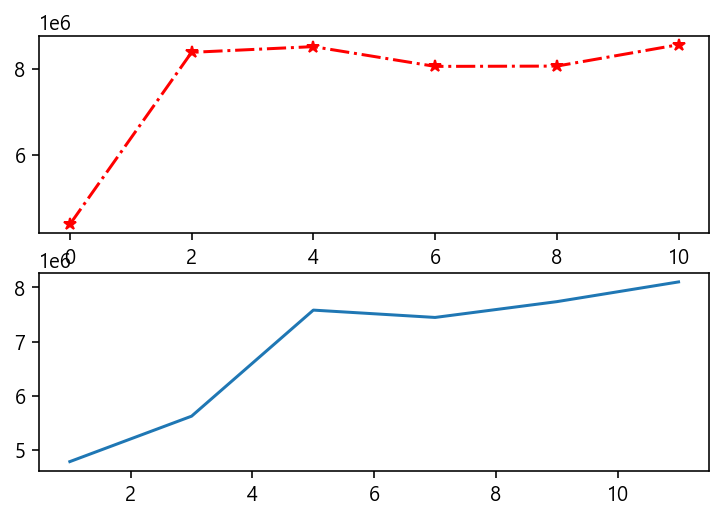

In [116]:
x = p_s.보험료수익
y = p_h.보험료수익# PI * 10 너비에, 500개의 점을 균일하게 찍기
fig, axes = plt.subplots(2, 1) # 2개의 그래프가 들어가는 Figure 생성
axes[0].plot(x,linestyle="-.", marker="*", color="red", label='보험료수익비교') 
axes[1].plot(y) 
fig.savefig("보험료수익비교.png")

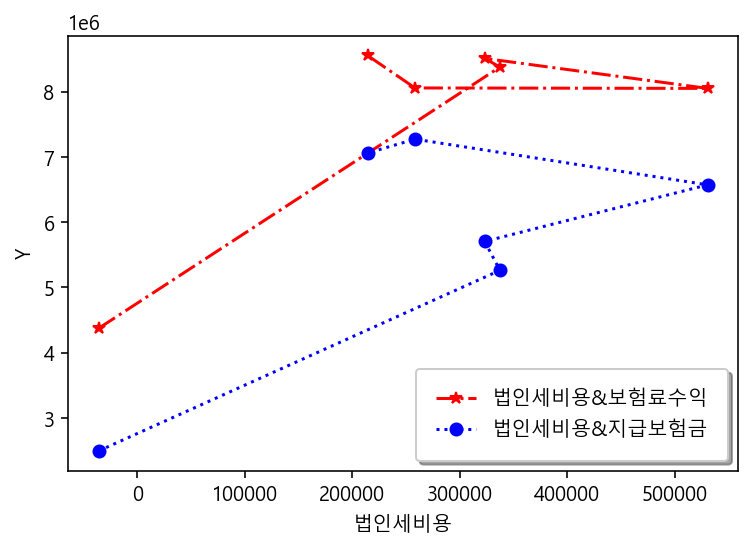

In [118]:
x = p_s.법인세비용
y1 = p_s.보험료수익
y2 = p_s.지급보험금
plt.plot(x, y1, linestyle="-.", marker="*", color="red", label="법인세비용&보험료수익")
plt.plot(x, y2, linestyle=":", marker="o", color="blue", label="법인세비용&지급보험금")
plt.xlabel('법인세비용')
plt.ylabel("Y")
plt.legend(
  shadow=True,
  borderpad=1
)
plt.show()

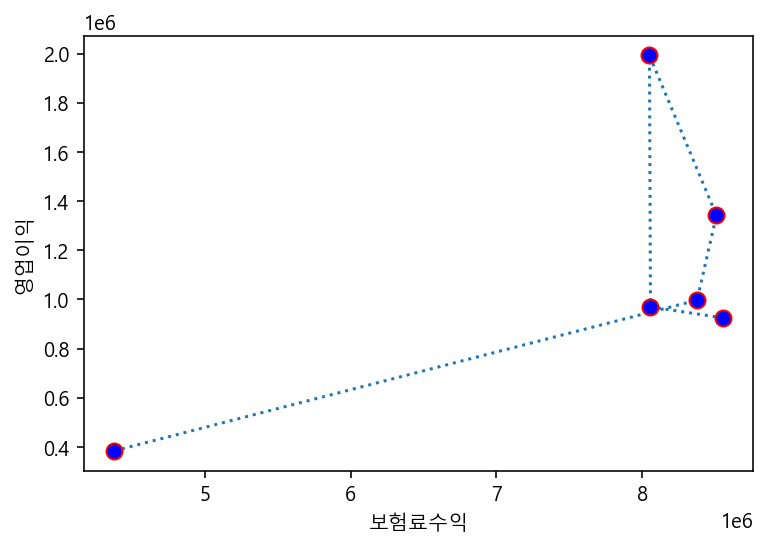

In [57]:
x = p_s.보험료수익
y1 = p_s.영업이익
plt.plot(
    x, y1,
    linestyle=":",
    marker="o",
    markersize=8,
    markerfacecolor="blue",
    markeredgecolor="red"
)
plt.xlabel('보험료수익')
plt.ylabel("영업이익")
plt.show()

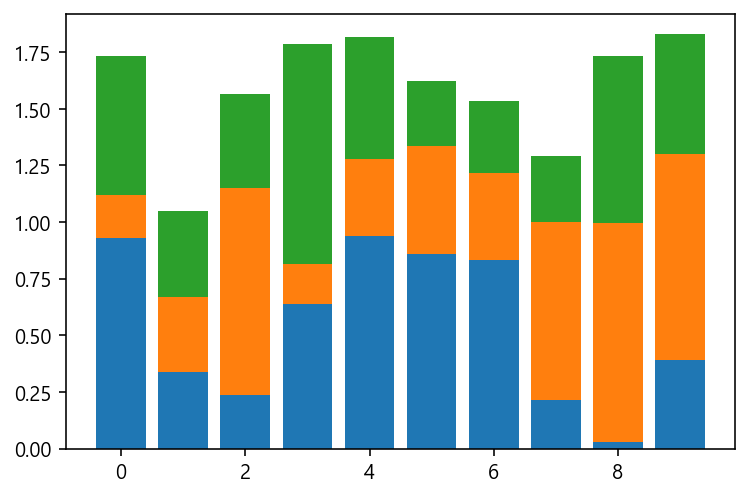

In [64]:
x = np.random.rand(10) # 아래 막대
y = np.random.rand(10) # 중간 막대
z = np.random.rand(10) # 위 막대
data = [x, y, z]
x_array = np.arange(10)
for i in range(0, 3): # 누적 막대의 종류가 3개
  plt.bar(
    x_array, # 0부터 10까지의 X 위치에서
    data[i], # 각 높이(10개)만큼 쌓음
    bottom=np.sum(data[:i], axis=0)
  )
plt.show()

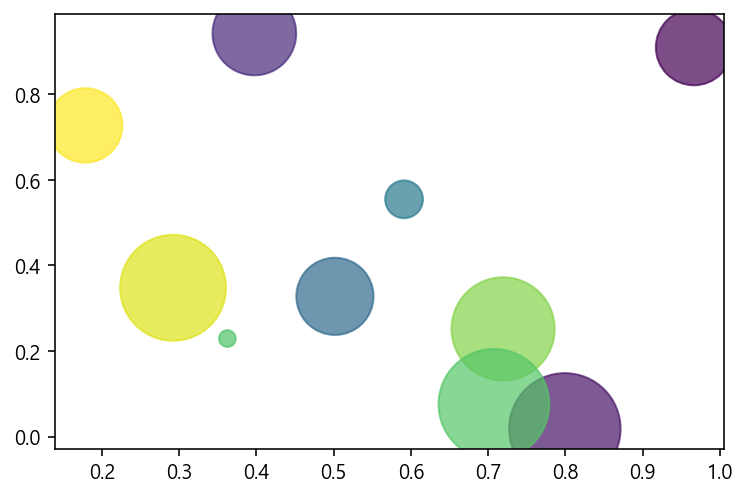

In [65]:
import matplotlib.pyplot as plt
import numpy as np

x = np.random.rand(10)
y = np.random.rand(10)
colors = np.random.randint(0, 100, 10)
sizes = np.pi * 1000 * np.random.rand(10)
plt.scatter(x, y, c=colors, s=sizes, alpha=0.7)
plt.show()

In [125]:
g_s = p_s.groupby(['보고기간'])['영업이익'].mean()
g_h = p_h.groupby(['보고기간'])['영업이익'].mean()

In [126]:
g_s_dict = g_s.to_dict()
g_h_dict = g_h.to_dict()

In [110]:
g_s_dict.keys()

dict_keys([2015.06, 2016.06, 2017.06, 2018.06, 2019.06, 2020.06])

In [109]:
g_s_dict.values()

dict_values([383687.0, 996904.0, 1342105.0, 1992364.0, 969591.0, 924642.0])

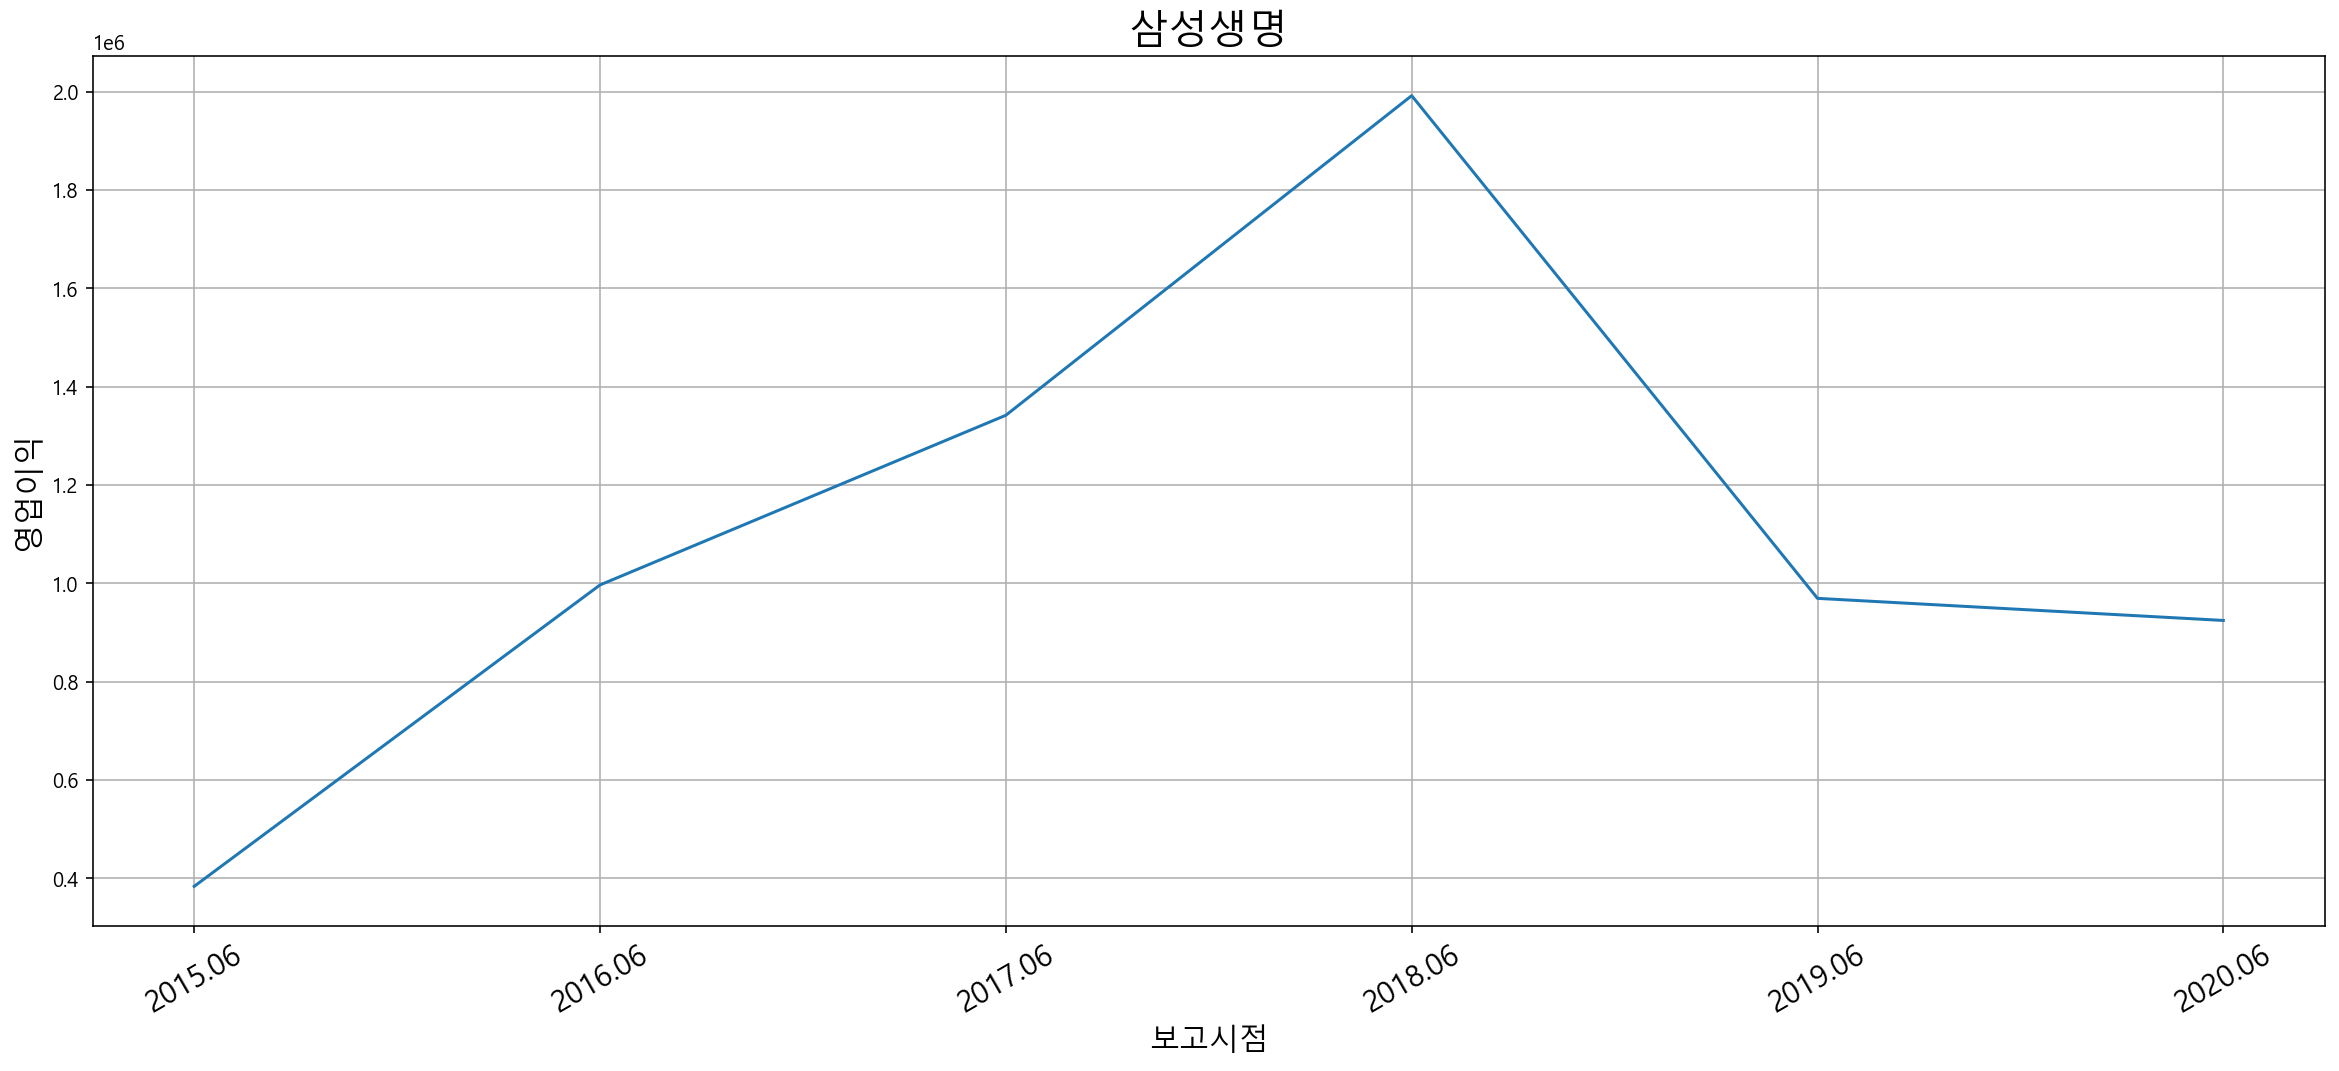

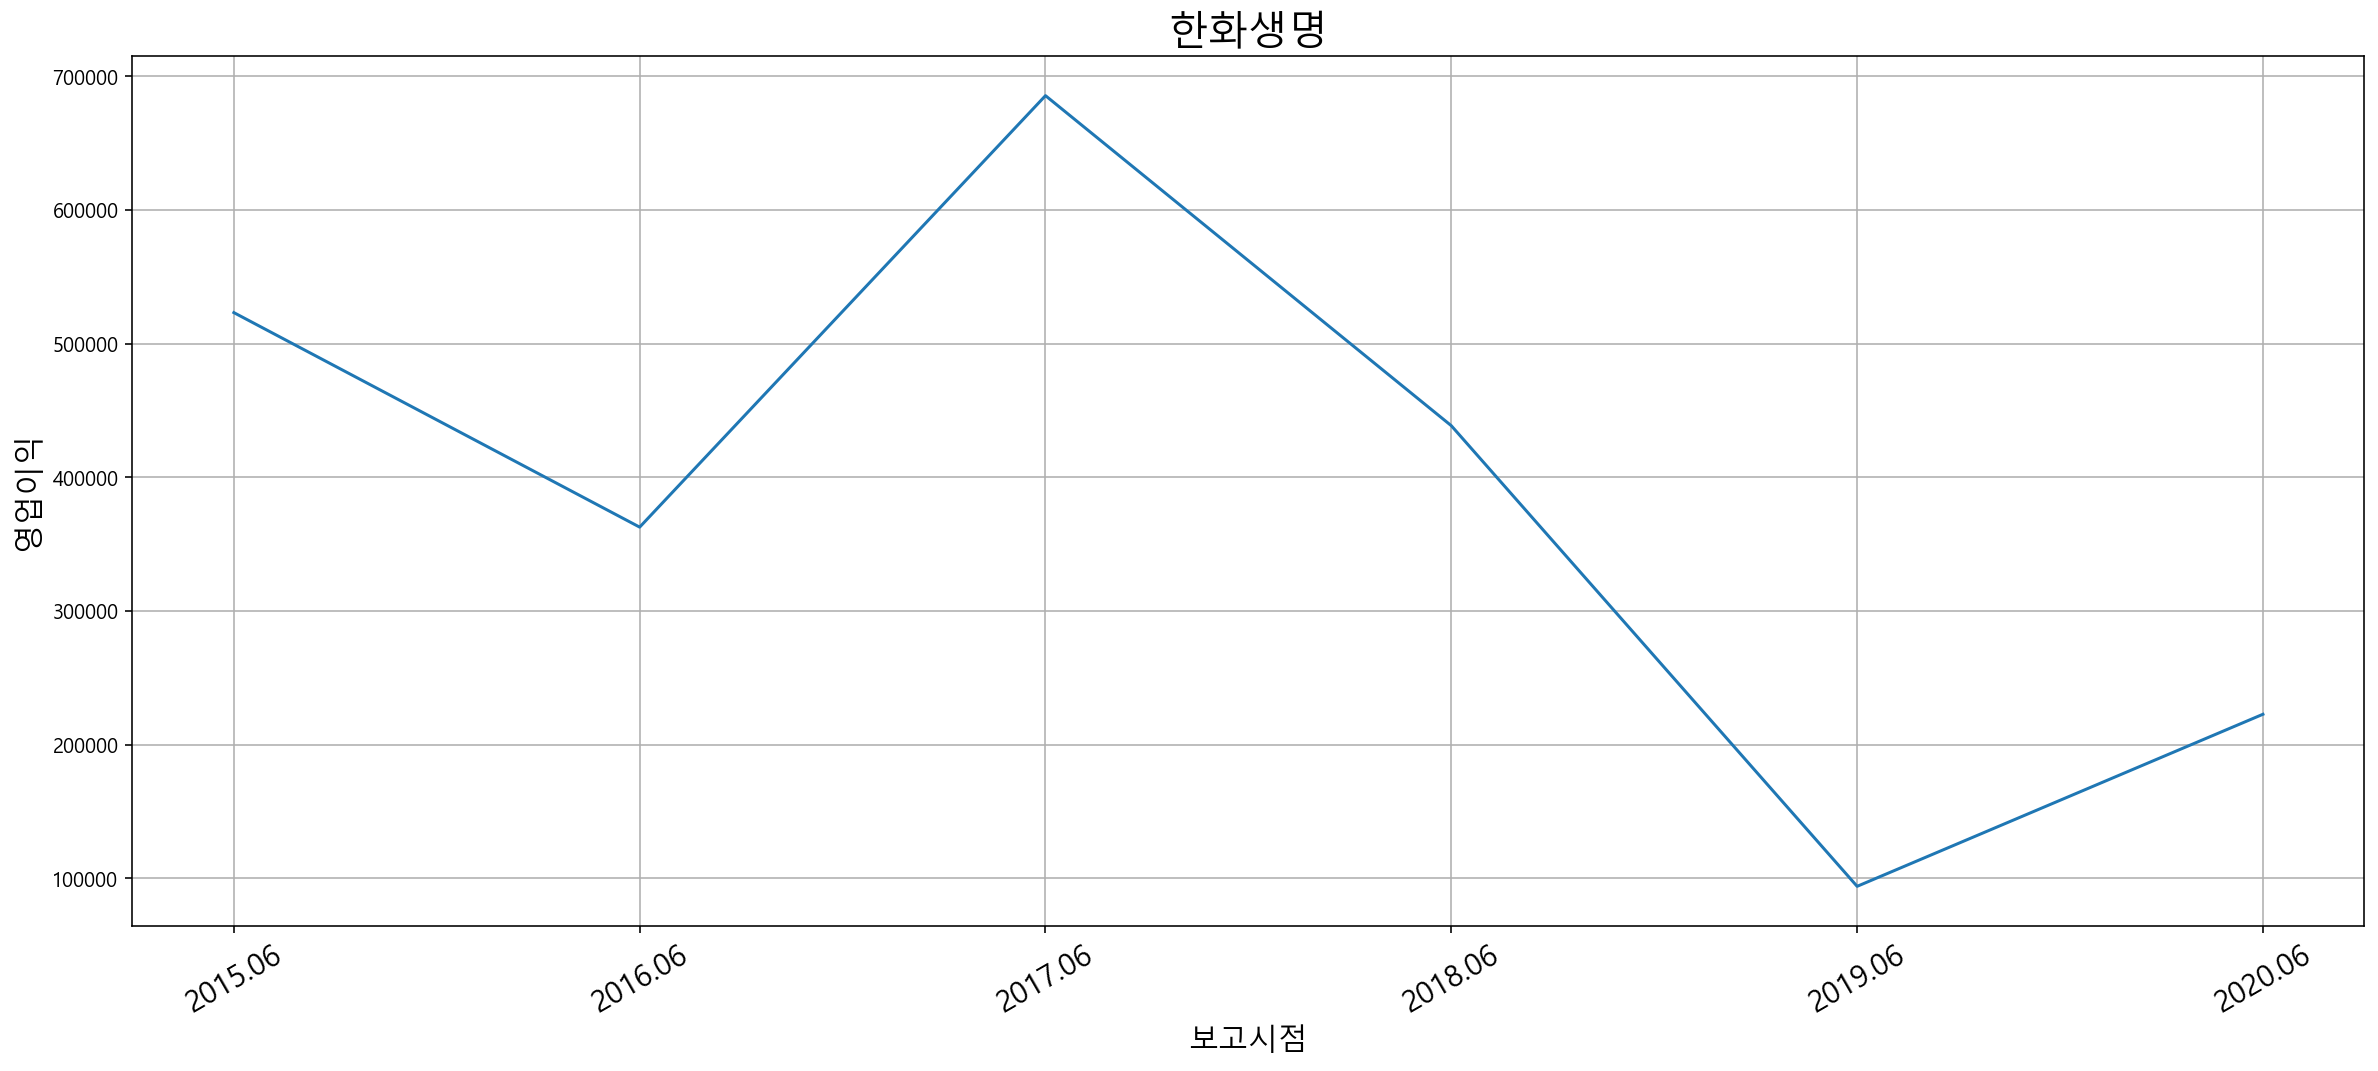

In [136]:
plt.figure(figsize=(20,8))
plt.plot(g_s_dict.values())
plt.title('삼성생명', fontsize = 20)
plt.xlabel('보고시점',fontsize = 15)
plt.ylabel('영업이익', fontsize = 15)
plt.xticks(np.arange(6), g_s_dict.keys(), rotation = 30, fontsize = 15)
plt.grid()
plt.savefig('삼성생명 영업이익 그래프.png')

plt.figure(figsize=(20,8))
plt.plot(g_h_dict.values())
plt.title('한화생명', fontsize = 20)
plt.xlabel('보고시점',fontsize = 15)
plt.ylabel('영업이익', fontsize = 15)
plt.xticks(np.arange(6), g_h_dict.keys(), rotation = 30, fontsize = 15)
plt.grid()
plt.savefig('한화생명 영업이익 그래프.png')